In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
plt.rcParams['figure.figsize']= (15,5)

In [35]:
path = "../dataset/"
filename = "data_1_final.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=';')

In [36]:
# Plotando 

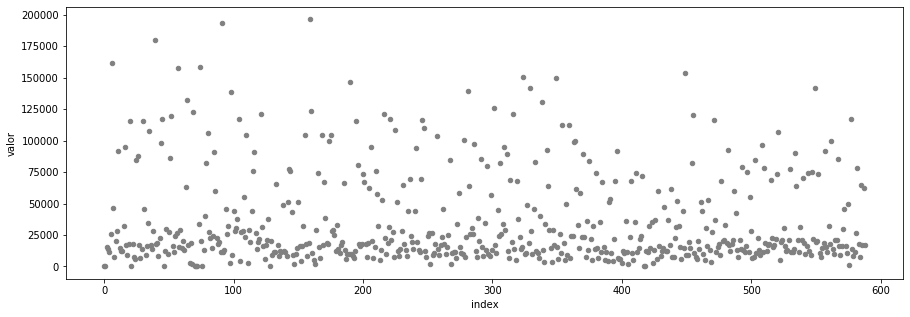

In [37]:
df.plot(kind='scatter', x='index', y='valor', color='gray')

In [38]:
df.tail(21)

,index,dia,mes,ano,valor
568,568,3,10,2018,15895.50
569,569,4,10,2018,9273.00
570,570,5,10,2018,16079.25
571,571,6,10,2018,29740.60
572,572,7,10,2018,45392.70
573,573,10,10,2018,15858.59
574,574,11,10,2018,10426.85
575,575,12,10,2018,49380.00
576,576,13,10,2018,1006.00
577,577,14,10,2018,117363.60


In [39]:
df_index = []
for i in range(568,589):
    df_index.append([i])

    

In [40]:
df_index

[[568],
 [569],
 [570],
 [571],
 [572],
 [573],
 [574],
 [575],
 [576],
 [577],
 [578],
 [579],
 [580],
 [581],
 [582],
 [583],
 [584],
 [585],
 [586],
 [587],
 [588]]

In [41]:
# Dropando dias do ultimo mes da df

In [42]:
proximas_faturas_dias = []
for i in range(568,589):
    valor = [df['valor'].values[i]]
    proximas_faturas_dias.append(valor)

df = df.drop(df.index[568:589])

target_df = proximas_faturas_dias

In [43]:
target_df

[[15895.5],
 [9273.0],
 [16079.25],
 [29740.6],
 [45392.7],
 [15858.59],
 [10426.85],
 [49380.0],
 [1006.0],
 [117363.6],
 [13757.0],
 [8507.8],
 [11581.7],
 [26245.9],
 [78560.85],
 [17529.25],
 [7865.8],
 [64380.3],
 [17235.1],
 [62124.4],
 [17325.9]]

In [44]:
# Test

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np

In [161]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [162]:
X = pd.DataFrame(df['index'])
y = pd.DataFrame(df['valor'])

In [163]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [164]:
pred_df = (model.predict(df_index))

In [165]:
pred_df


array([[30819.84885749],
       [30803.81751075],
       [30787.78730154],
       [30771.75822987],
       [30755.73029572],
       [30739.70349911],
       [30723.67784004],
       [30707.65331849],
       [30691.62993448],
       [30675.607688  ],
       [30659.58657906],
       [30643.56660764],
       [30627.54777376],
       [30611.53007742],
       [30595.5135186 ],
       [30579.49809732],
       [30563.48381357],
       [30547.47066735],
       [30531.45865867],
       [30515.44778752],
       [30499.4380539 ]])

In [166]:
y_test = pred_df
y_pred = target_df
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  22625.262836139336
MSE 815897565.9333471
RMSE 28563.92070310634


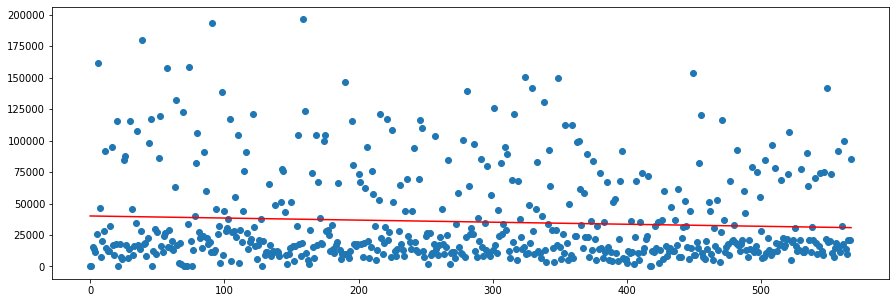

In [167]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [168]:
model = LinearRegression()

In [169]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
y_test = pred_df
y_pred = target_df
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  22625.262836139336
MSE 815897565.9333471
RMSE 28563.92070310634


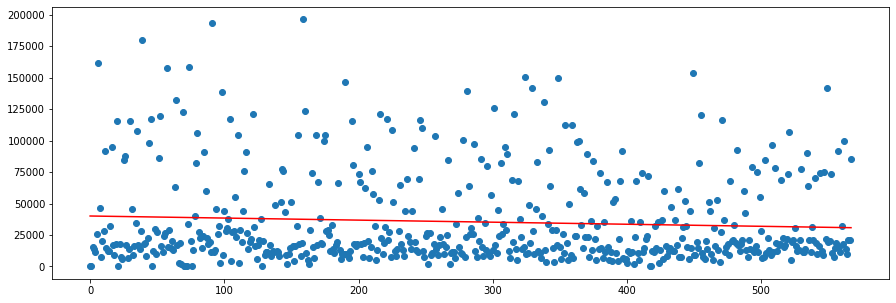

In [171]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [172]:
df.corr()

,index,dia,mes,ano,valor
index,1.000000,0.005351,-0.131565,0.915948,-0.073310
dia,0.005351,1.000000,0.041676,-0.046298,-0.016397
mes,-0.131565,0.041676,1.000000,-0.516613,0.093334
ano,0.915948,-0.046298,-0.516613,1.000000,-0.101280
valor,-0.073310,-0.016397,0.093334,-0.101280,1.000000


In [173]:
import seaborn as sns

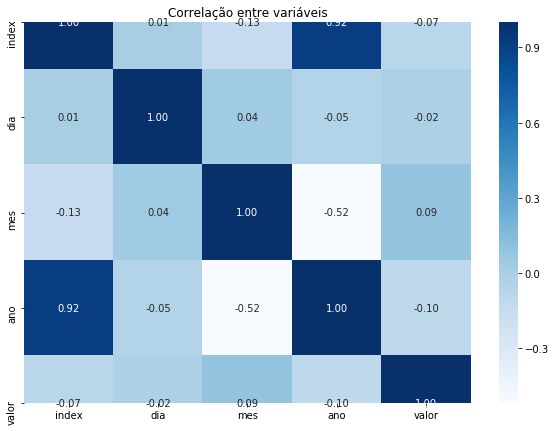

In [174]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()